In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
student_df = pd.read_csv('student_performance_data.csv')

# Display the first few rows of the dataset
student_df.head()


,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [34]:
for column in student_df.columns:
    print(column)


StudentID
Gender
Age
StudyHoursPerWeek
AttendanceRate
GPA
Major
PartTimeJob
ExtraCurricularActivities


In [35]:
# Display summary statistics for the dataset
student_df.describe(include='all')


,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
count,500.000000,500,500.000000,500.000000,500.000000,500.00000,500,500,500
unique,NaN,2,NaN,NaN,NaN,NaN,5,2,2
top,NaN,Female,NaN,NaN,NaN,NaN,Business,Yes,No
freq,NaN,256,NaN,NaN,NaN,NaN,114,268,260
mean,250.500000,NaN,20.956000,19.876000,74.990380,2.98516,NaN,NaN,NaN
std,144.481833,NaN,2.000517,11.471347,14.565917,0.56362,NaN,NaN,NaN
min,1.000000,NaN,18.000000,1.000000,50.010000,2.00000,NaN,NaN,NaN
25%,125.750000,NaN,19.000000,10.000000,62.607500,2.48750,NaN,NaN,NaN
50%,250.500000,NaN,21.000000,20.500000,75.730000,3.00000,NaN,NaN,NaN
75%,375.250000,NaN,23.000000,30.000000,87.220000,3.48000,NaN,NaN,NaN


In [36]:
# Check for missing values in the dataset
missing_values = student_df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [37]:
# Drop rows with missing values (if any)
student_df_cleaned = student_df.dropna()

# Convert categorical columns to numerical values using encoding
student_df_cleaned = pd.get_dummies(student_df_cleaned, drop_first=True)

# Display the shape of the cleaned dataset
student_df_cleaned.shape


(500, 12)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


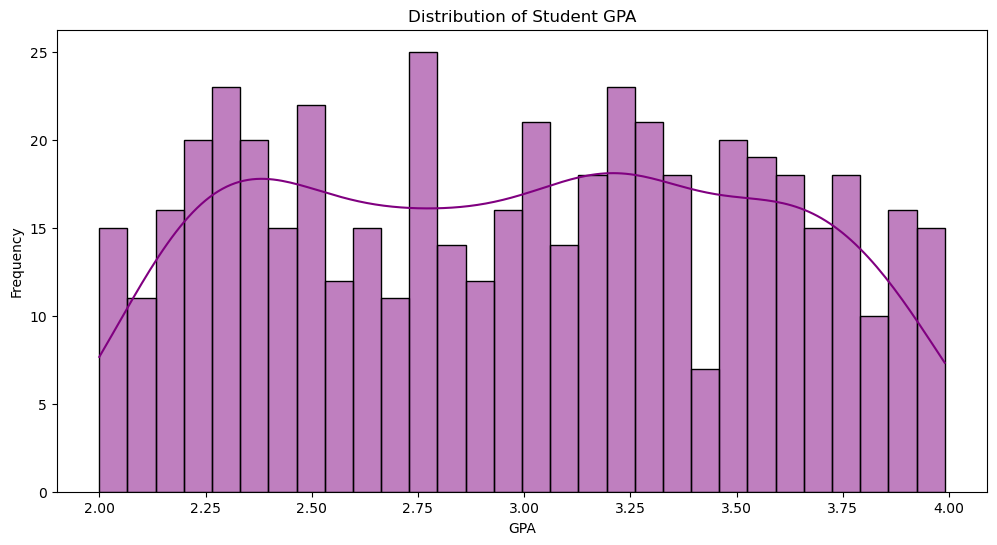

In [38]:
# Plot the distribution of GPA with Kernel Density Estimate (KDE)
plt.figure(figsize=(12, 6))
sns.histplot(student_df_cleaned['GPA'], bins=30, kde=True, color='purple')
plt.title('Distribution of Student GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()


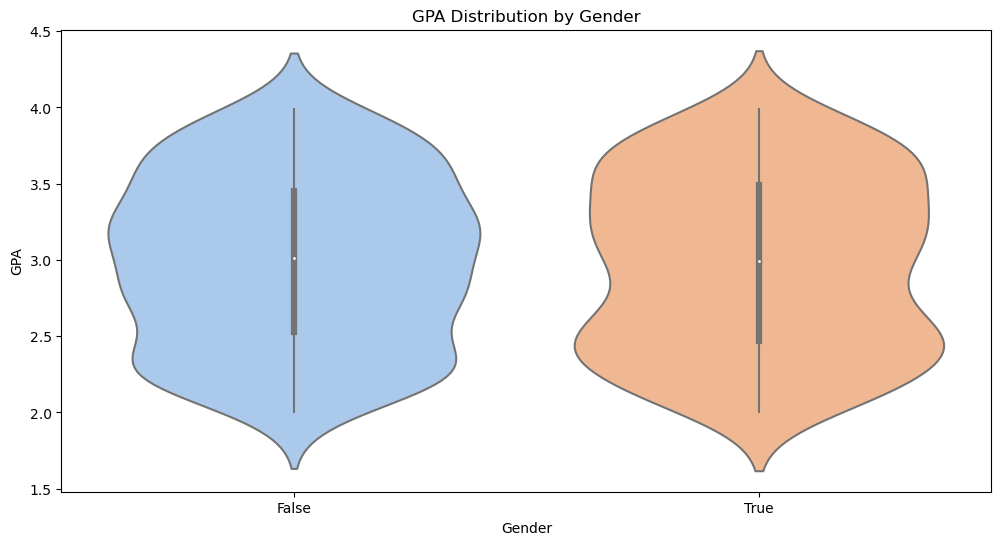

In [39]:
# Plot the GPA distribution by gender using a violin plot
if 'Gender_Male' in student_df_cleaned.columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=student_df_cleaned, x='Gender_Male', y='GPA', palette='pastel')
    plt.title('GPA Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('GPA')
    plt.show()
else:
    print("Column 'Gender_Male' not found. Check the cleaned dataset columns.")


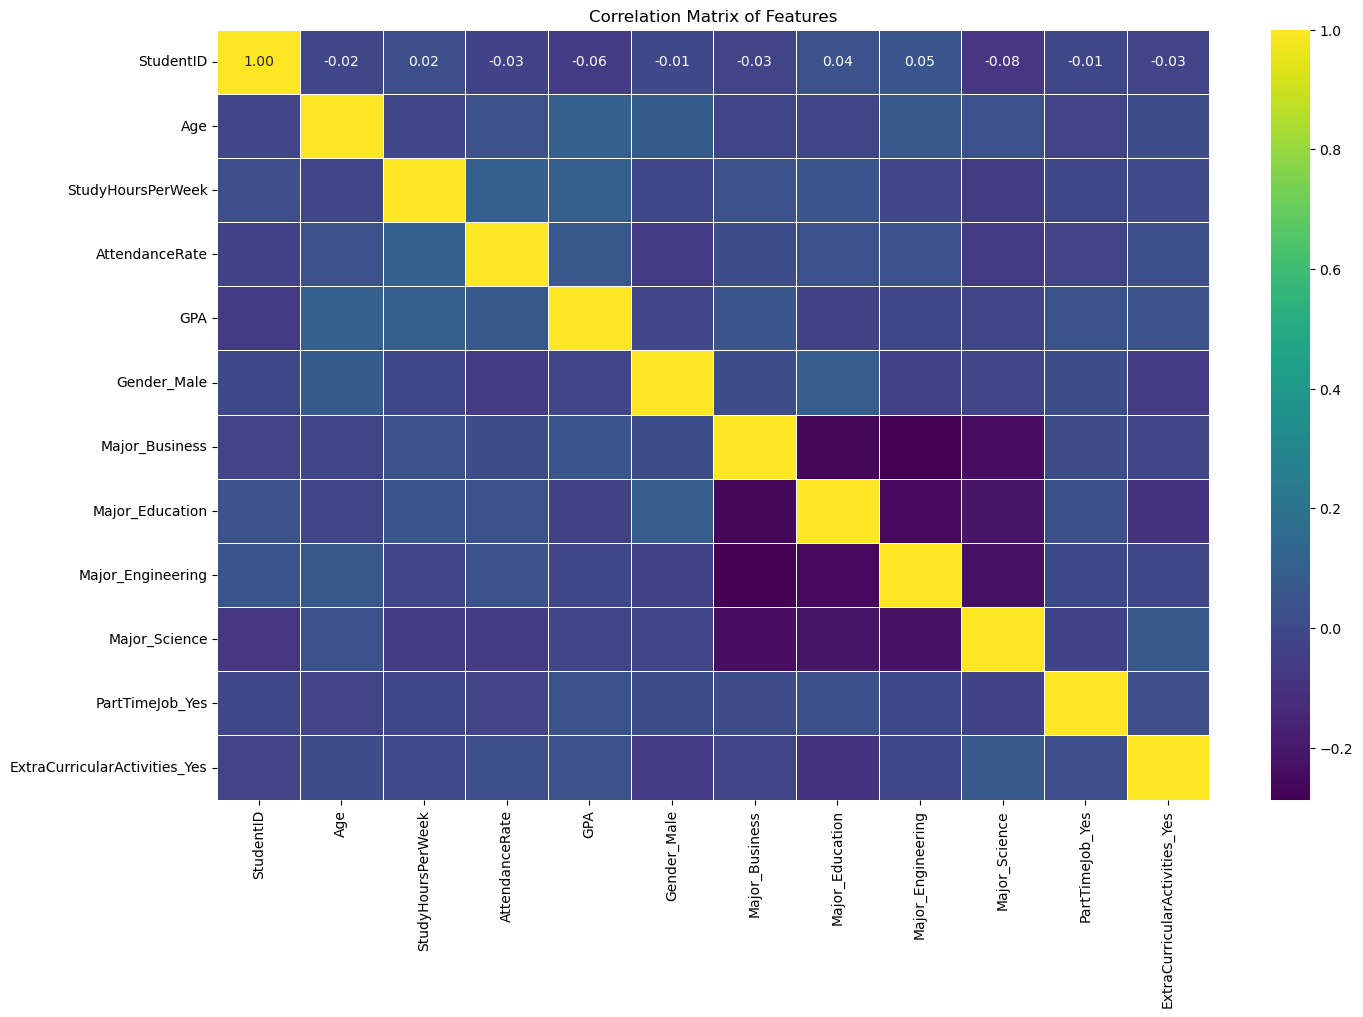

In [40]:
# Compute correlation matrix
correlation_matrix = student_df_cleaned.corr()

# Plot the correlation matrix with annotations
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


# This code will produce a pairplot showing the relationships and distributions of GPA, Age, StudyHoursPerWeek, and AttendanceRate. If any of these columns are missing, it will notify you.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

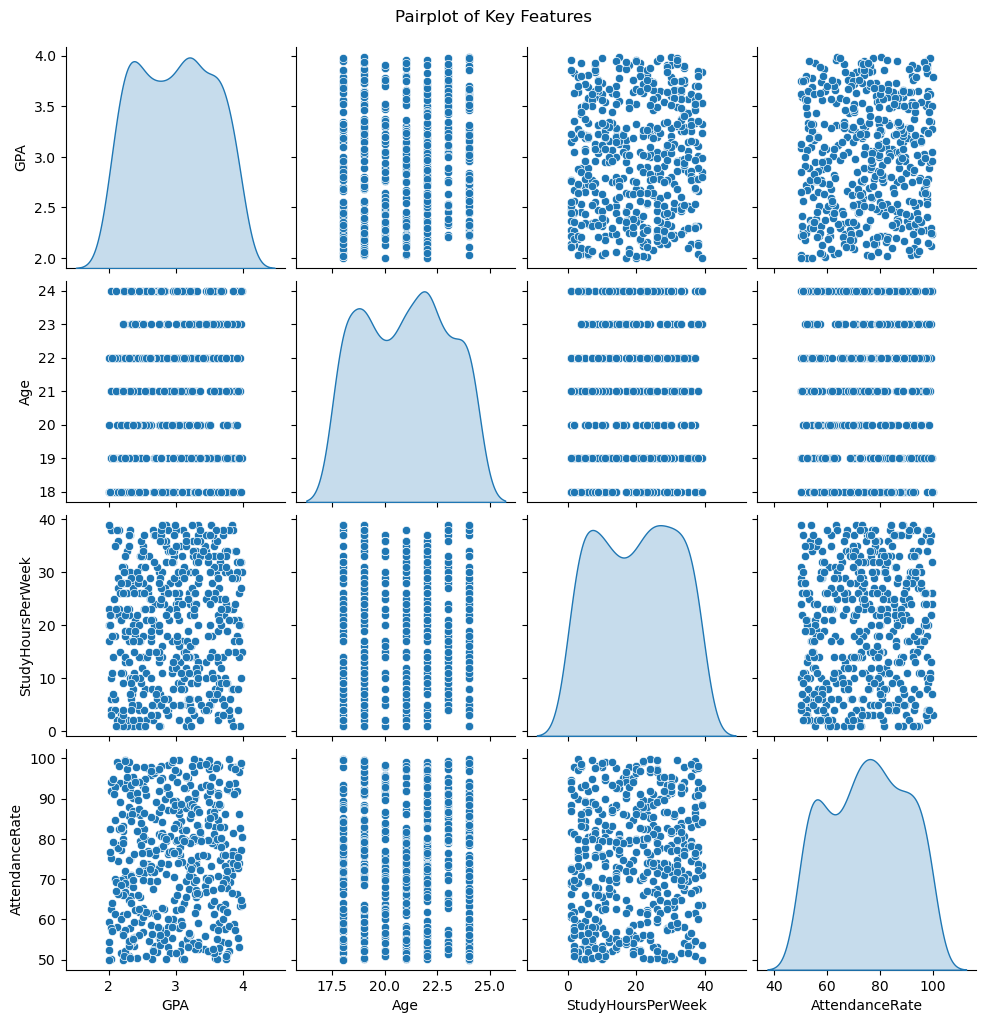

In [41]:
# Plot pairplot with facet grid for key features
# Ensure to use available columns in the dataset
pairplot_columns = ['GPA', 'Age', 'StudyHoursPerWeek', 'AttendanceRate']
available_columns = [col for col in pairplot_columns if col in student_df_cleaned.columns]

if available_columns:
    sns.pairplot(student_df_cleaned[available_columns], diag_kind='kde')
    plt.suptitle('Pairplot of Key Features', y=1.02)
    plt.show()
else:
    print("None of the specified columns are available for pairplot.")


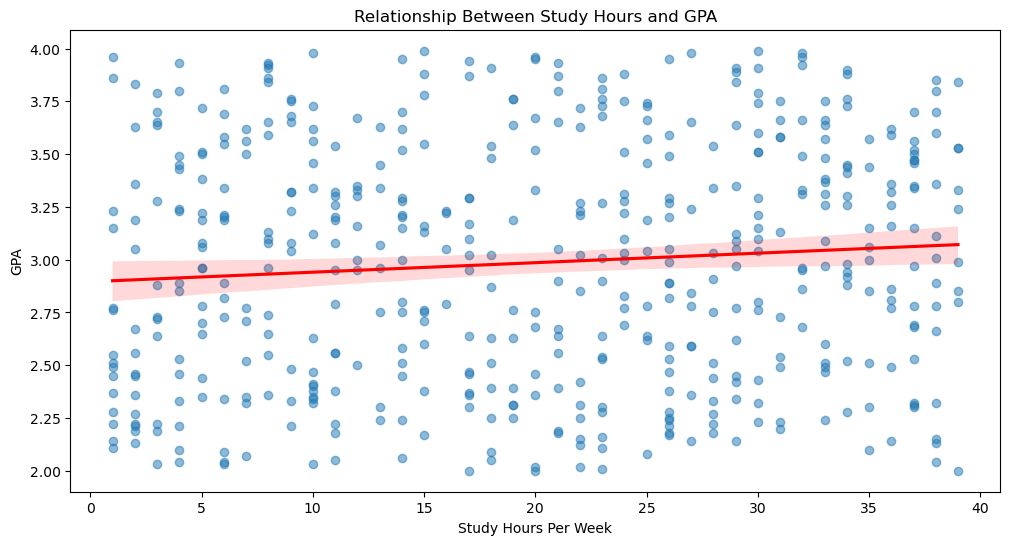

In [42]:
# Plot the relationship between study hours and GPA with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=student_df_cleaned, x='StudyHoursPerWeek', y='GPA', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between Study Hours and GPA')
plt.xlabel('Study Hours Per Week')
plt.ylabel('GPA')
plt.show()


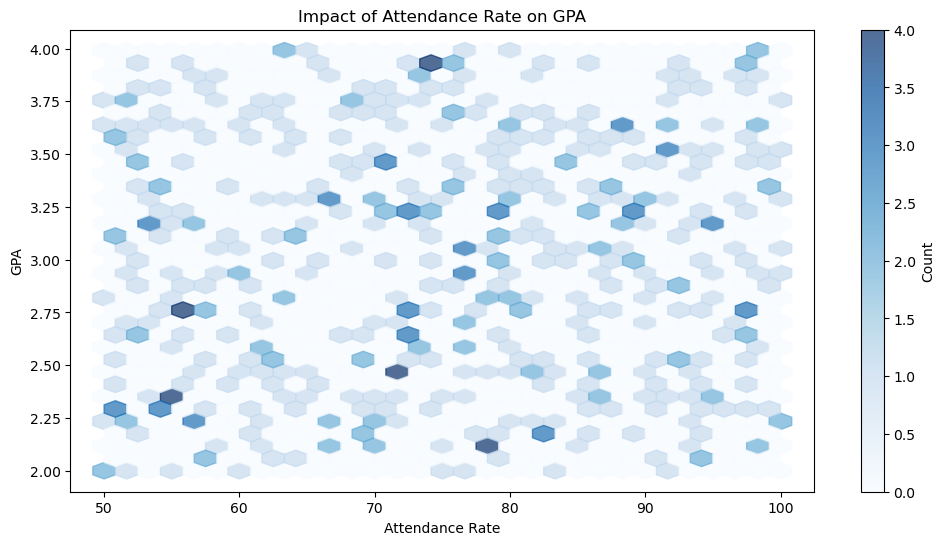

In [43]:
# Plot the impact of attendance rate on GPA using a hexbin plot
plt.figure(figsize=(12, 6))
plt.hexbin(student_df_cleaned['AttendanceRate'], student_df_cleaned['GPA'], gridsize=30, cmap='Blues', alpha=0.7)
plt.colorbar(label='Count')
plt.title('Impact of Attendance Rate on GPA')
plt.xlabel('Attendance Rate')
plt.ylabel('GPA')
plt.show()


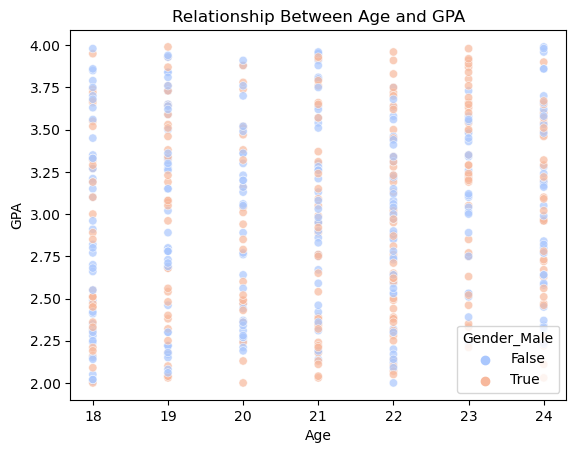

In [44]:
# Plot a scatter plot matrix to visualize relationships between age and GPA
sns.scatterplot(data=student_df_cleaned, x='Age', y='GPA', hue='Gender_Male', palette='coolwarm', alpha=0.7)
plt.title('Relationship Between Age and GPA')
plt.xlabel('Age')
plt.ylabel('GPA')
plt.show()


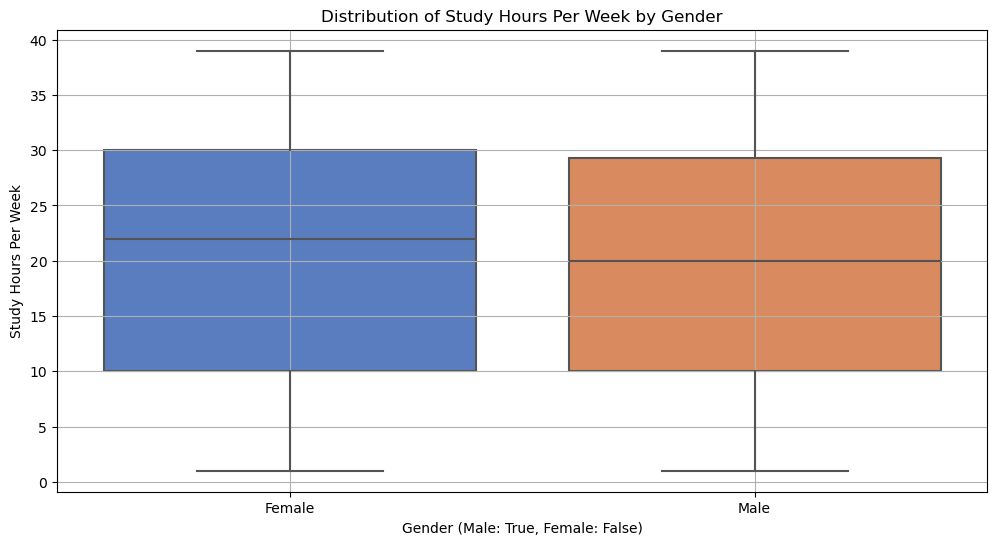

In [45]:
plt.figure(figsize=(12, 6))

# Plot the box plot using 'Gender_Male' instead of 'Gender'
sns.boxplot(data=student_df_cleaned, x='Gender_Male', y='StudyHoursPerWeek', palette='muted')
plt.title('Distribution of Study Hours Per Week by Gender')
plt.xlabel('Gender (Male: True, Female: False)')
plt.ylabel('Study Hours Per Week')
plt.grid(True)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Label the x-axis ticks
plt.show()


C:\Users\umer\AppData\Local\Temp\ipykernel_6816\1039187717.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=student_df_cleaned, x='Gender_Male', y='StudyHoursPerWeek', palette='muted')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


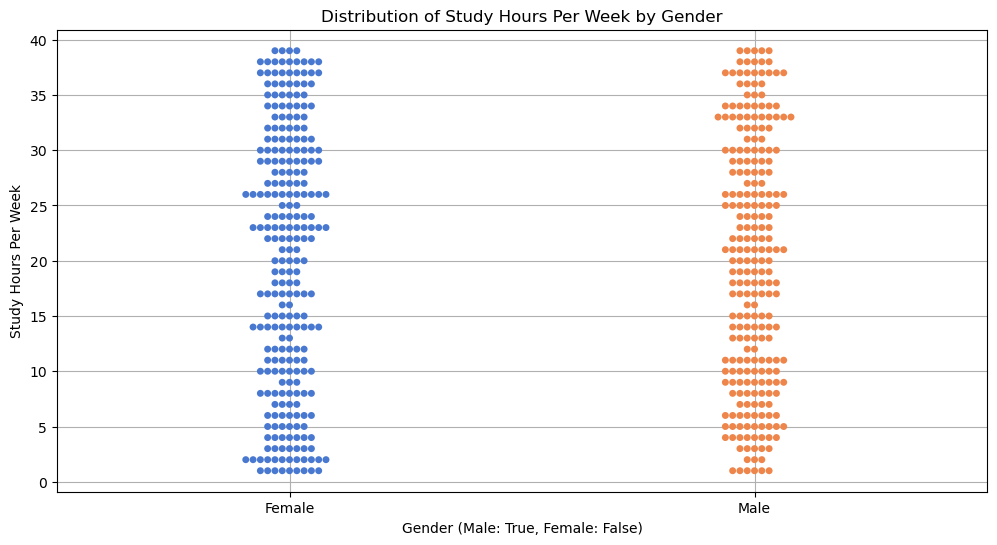

In [46]:
plt.figure(figsize=(12, 6))

# Plot the swarm plot using 'Gender_Male' instead of 'Gender'
sns.swarmplot(data=student_df_cleaned, x='Gender_Male', y='StudyHoursPerWeek', palette='muted')
plt.title('Distribution of Study Hours Per Week by Gender')
plt.xlabel('Gender (Male: True, Female: False)')
plt.ylabel('Study Hours Per Week')
plt.grid(True)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Label the x-axis ticks
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


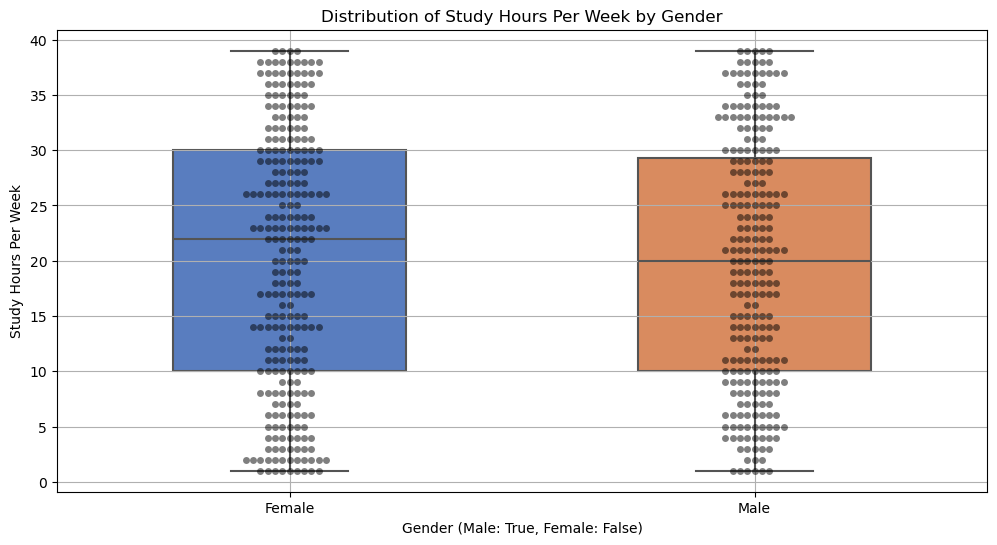

In [47]:
plt.figure(figsize=(12, 6))

# Plot the combined box and swarm plot using 'Gender_Male' instead of 'Gender'
sns.boxplot(data=student_df_cleaned, x='Gender_Male', y='StudyHoursPerWeek', palette='muted', width=0.5)
sns.swarmplot(data=student_df_cleaned, x='Gender_Male', y='StudyHoursPerWeek', color='k', alpha=0.5)
plt.title('Distribution of Study Hours Per Week by Gender')
plt.xlabel('Gender (Male: True, Female: False)')
plt.ylabel('Study Hours Per Week')
plt.grid(True)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Label the x-axis ticks
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


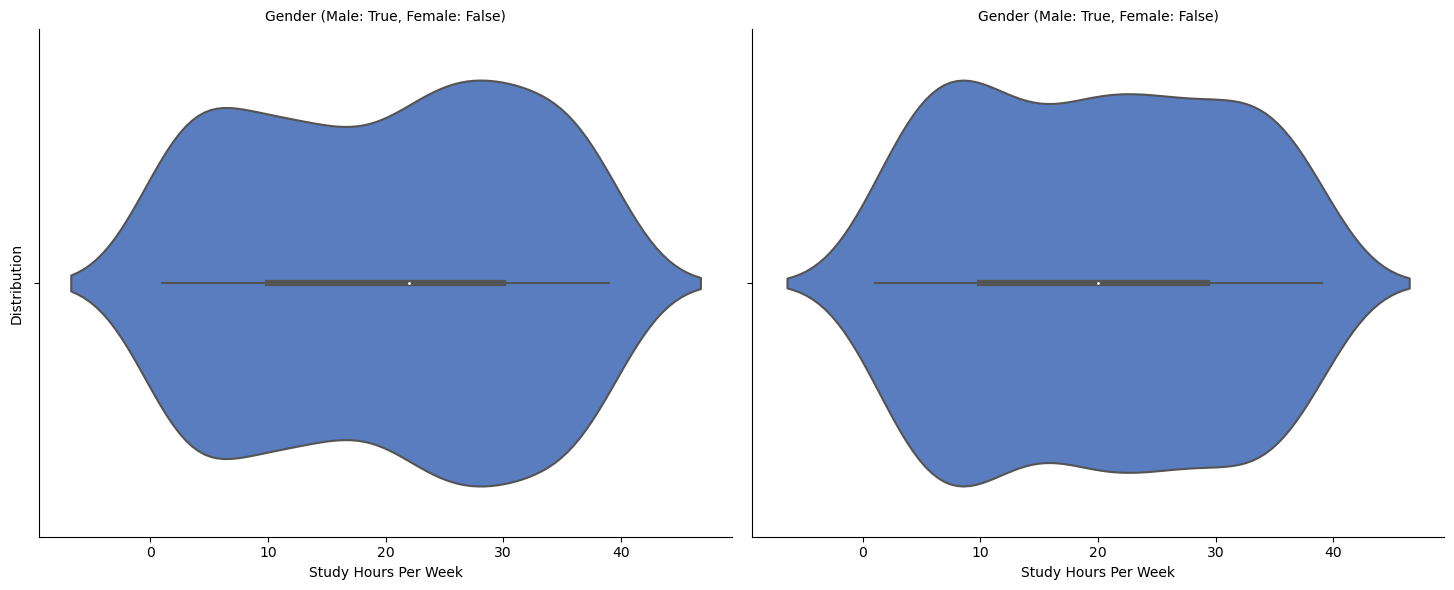

In [48]:
g = sns.FacetGrid(student_df_cleaned, col='Gender_Male', height=6, aspect=1.2)
g.map(sns.violinplot, 'StudyHoursPerWeek', palette='muted')
g.set_axis_labels('Study Hours Per Week', 'Distribution')
g.set_titles('Gender (Male: True, Female: False)')
plt.show()


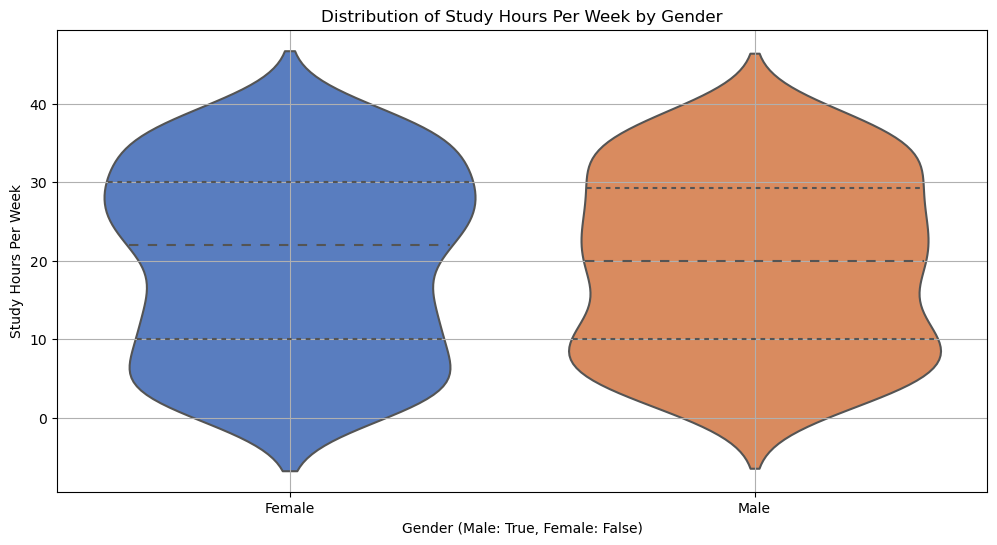

In [49]:
plt.figure(figsize=(12, 6))

# Plot the violin plot with customization
sns.violinplot(data=student_df_cleaned, x='Gender_Male', y='StudyHoursPerWeek', palette='muted', inner='quartile')
plt.title('Distribution of Study Hours Per Week by Gender')
plt.xlabel('Gender (Male: True, Female: False)')
plt.ylabel('Study Hours Per Week')
plt.grid(True)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Label the x-axis ticks
plt.show()


In [50]:
features = ['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'Gender_Male']
target = 'GPA'
X = student_df_cleaned[features]
y = student_df_cleaned[target]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [53]:
y_pred = model.predict(X_test)


In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.3540470843460002
R-squared: 0.03278551011976083


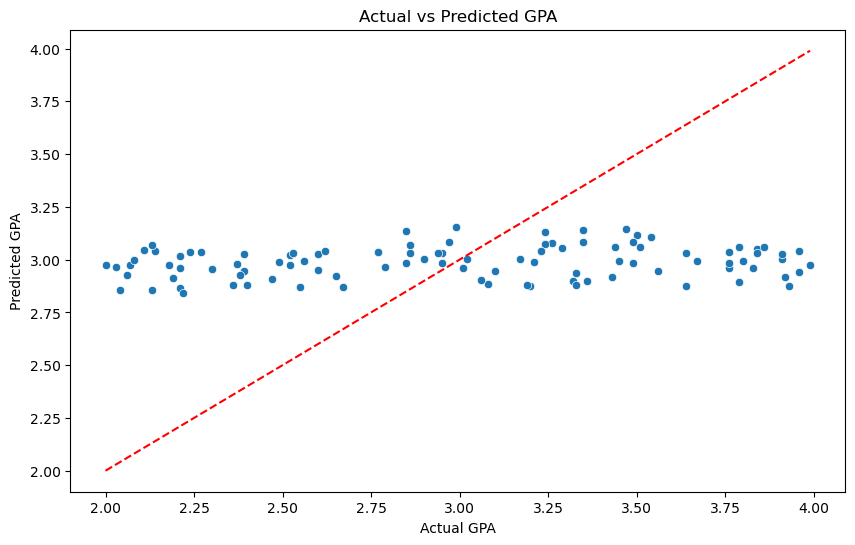

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()
